In [ ]:
!pip install imbalanced-learn
!pip install mlxtend
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np 
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from pandas_profiling import ProfileReport
from sklearn.model_selection import KFold, cross_val_score
import warnings
warnings.filterwarnings("ignore")

#Importing Libraries

# Loading Data

In [ ]:
# loadind data from csv file to a panda dataframe
thyroid_data=pd.read_csv("/content/sample_data/hypothyroid.csv")

In [ ]:
# printing the first 5 rows of the dataframe
thyroid_data

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,41.0,F,f,f,f,f,f,f,f,f,...,t,125.0,t,1.14,t,109.0,f,NaN,SVHC,P
1,23.0,F,f,f,f,f,f,f,f,f,...,t,102.0,f,NaN,f,NaN,f,NaN,other,P
2,46.0,M,f,f,f,f,f,f,f,f,...,t,109.0,t,0.91,t,120.0,f,NaN,other,P
3,70.0,F,t,f,f,f,f,f,f,f,...,t,175.0,f,NaN,f,NaN,f,NaN,other,P
4,70.0,F,f,f,f,f,f,f,f,f,...,t,61.0,t,0.87,t,70.0,f,NaN,SVI,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30.0,F,f,f,f,f,f,f,f,f,...,f,NaN,f,NaN,f,NaN,f,NaN,other,P
3768,68.0,F,f,f,f,f,f,f,f,f,...,t,124.0,t,1.08,t,114.0,f,NaN,SVI,P
3769,74.0,F,f,f,f,f,f,f,f,f,...,t,112.0,t,1.07,t,105.0,f,NaN,other,P
3770,72.0,M,f,f,f,f,f,f,f,f,...,t,82.0,t,0.94,t,87.0,f,NaN,SVI,P


In [ ]:
# printing all my entries and features in dataframe
thyroid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        3772 non-null   object
 1   sex                        3772 non-null   object
 2   on thyroxine               3772 non-null   object
 3   query on thyroxine         3772 non-null   object
 4   on antithyroid medication  3772 non-null   object
 5   sick                       3772 non-null   object
 6   pregnant                   3772 non-null   object
 7   thyroid surgery            3772 non-null   object
 8   I131 treatment             3772 non-null   object
 9   query hypothyroid          3772 non-null   object
 10  query hyperthyroid         3772 non-null   object
 11  lithium                    3772 non-null   object
 12  goitre                     3772 non-null   object
 13  tumor                      3772 non-null   object
 14  hypopitu

In [ ]:
# number of rows and columns in dataframe
thyroid_data.shape

(3772, 30)

In [ ]:
thyroid_data['thyroid surgery'].value_counts()

f    3719
t      53
Name: thyroid surgery, dtype: int64

In [ ]:
# statical measures
thyroid_data.describe()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
count,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,...,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772
unique,94,3,2,2,2,2,2,2,2,2,...,2,242,2,147,2,235,1,1,5,2
top,59,F,f,f,f,f,f,f,f,f,...,t,?,t,?,t,?,f,?,other,P
freq,95,2480,3308,3722,3729,3625,3719,3719,3713,3538,...,3541,231,3385,387,3387,385,3772,3772,2201,3481


In [ ]:
thyroid_data.replace('?',np.nan,inplace=True)

In [ ]:
thyroid_data.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,NaN,SVHC,P
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,NaN,f,NaN,f,NaN,other,P
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,NaN,other,P
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,NaN,f,NaN,f,NaN,other,P
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,NaN,SVI,P


In [ ]:
#checking for missing values in each columns
thyroid_data.isnull().sum()

age                             1
sex                           150
on thyroxine                    0
query on thyroxine              0
on antithyroid medication       0
sick                            0
pregnant                        0
thyroid surgery                 0
I131 treatment                  0
query hypothyroid               0
query hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
TSH measured                    0
TSH                           369
T3 measured                     0
T3                            769
TT4 measured                    0
TT4                           231
T4U measured                    0
T4U                           387
FTI measured                    0
FTI                           385
TBG measured                    0
TBG                          3772
referral source                 0
binaryClass   

In [ ]:
#distribution of target variables(It tells people with thyroid and not)
thyroid_data['binaryClass'].value_counts()

P    3481
N     291
Name: binaryClass, dtype: int64

# P --> who contains thyroid
# N --> who doesn't contain thyroid

In [ ]:
cols = ['age','FTI','TSH','T3','TT4','T4U']
for i in cols:
  thyroid_data[i] = pd.to_numeric(thyroid_data[i],errors = 'coerce')


In [ ]:
df_numerical_features = thyroid_data.select_dtypes(include='float64')
df_categorical_features = thyroid_data.select_dtypes(include='object')

In [ ]:
df_numerical_features.describe()

,age,TSH,T3,TT4,T4U,FTI,TBG
count,3771.000000,3403.000000,3003.000000,3541.000000,3385.000000,3387.000000,0.0
mean,51.735879,5.086766,2.013500,108.319345,0.995000,110.469649,NaN
std,20.084958,24.521470,0.827434,35.604248,0.195457,33.089698,NaN
min,1.000000,0.005000,0.050000,2.000000,0.250000,2.000000,NaN
25%,36.000000,0.500000,1.600000,88.000000,0.880000,93.000000,NaN
50%,54.000000,1.400000,2.000000,103.000000,0.980000,107.000000,NaN
75%,67.000000,2.700000,2.400000,124.000000,1.080000,124.000000,NaN
max,455.000000,530.000000,10.600000,430.000000,2.320000,395.000000,NaN


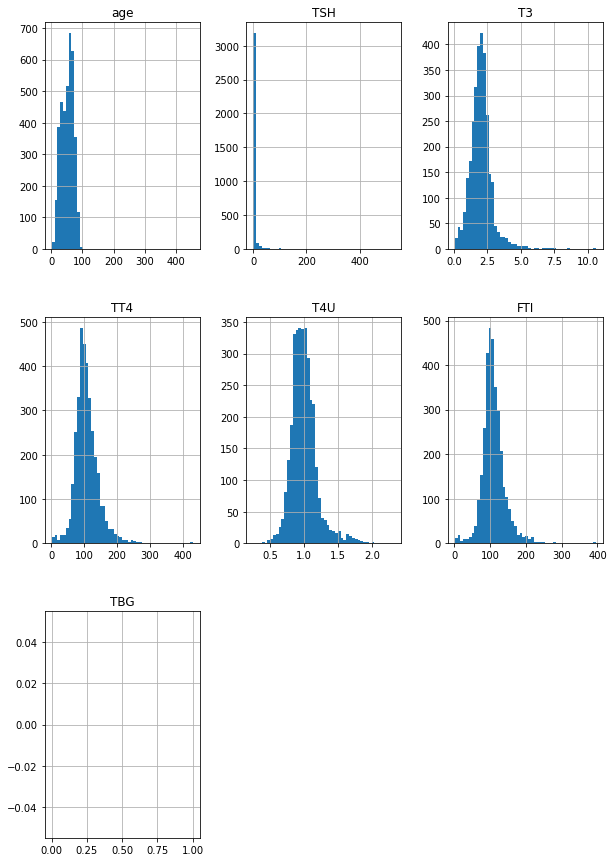

In [ ]:
%matplotlib inline
df_numerical_features.hist(bins=50 , figsize=(10,15))
plt.show()

In [ ]:
df_categorical_features.describe()

,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,...,hypopituitary,psych,TSH measured,T3 measured,TT4 measured,T4U measured,FTI measured,TBG measured,referral source,binaryClass
count,3622,3772,3772,3772,3772,3772,3772,3772,3772,3772,...,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772
unique,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,1,5,2
top,F,f,f,f,f,f,f,f,f,f,...,f,f,t,t,t,t,t,f,other,P
freq,2480,3308,3722,3729,3625,3719,3719,3713,3538,3535,...,3771,3588,3403,3003,3541,3385,3387,3772,2201,3481


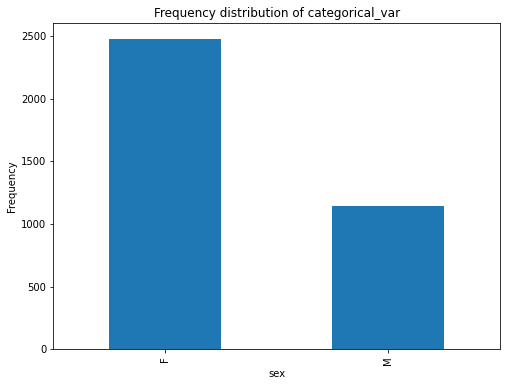

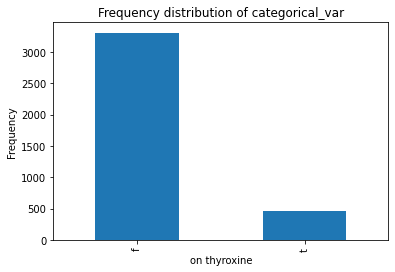

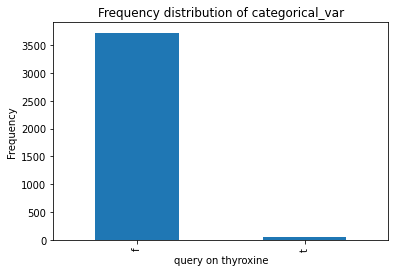

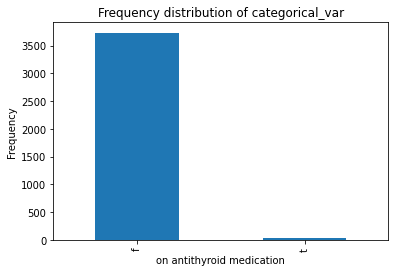

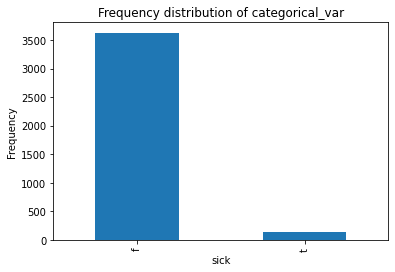

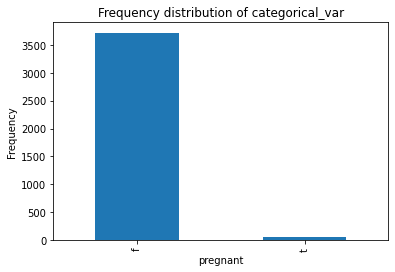

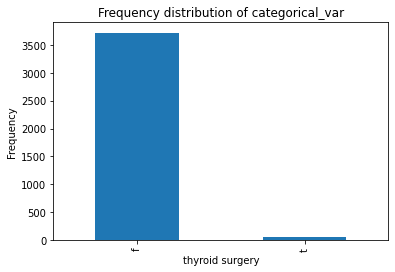

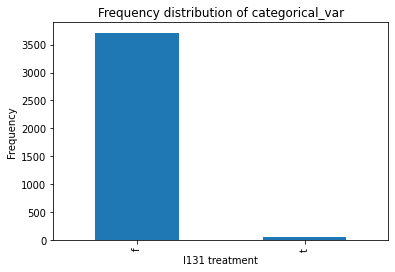

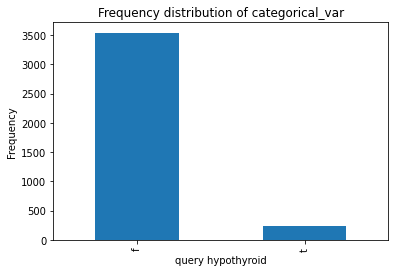

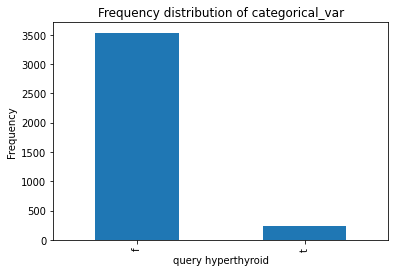

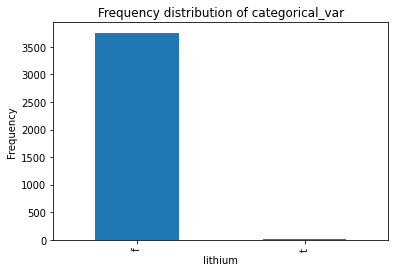

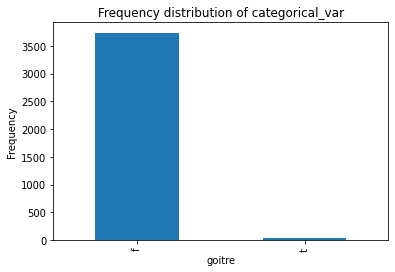

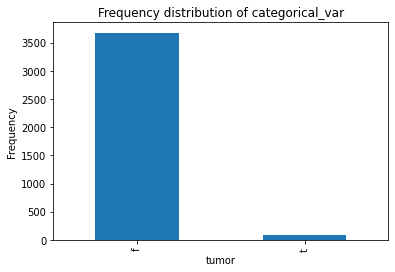

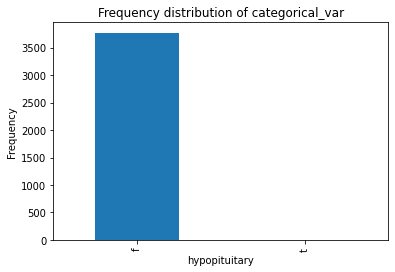

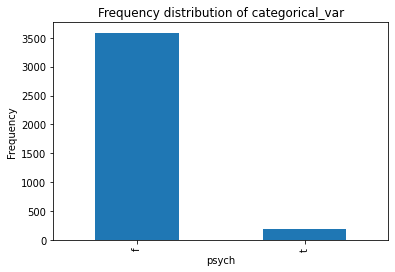

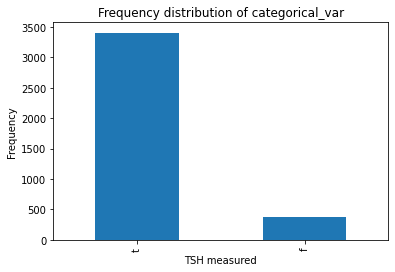

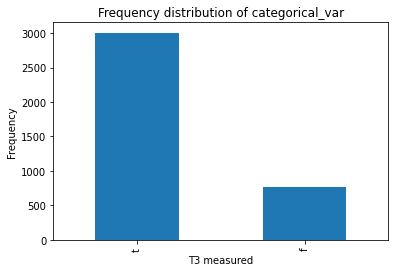

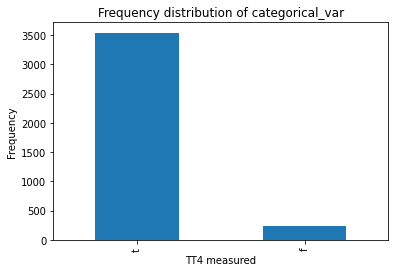

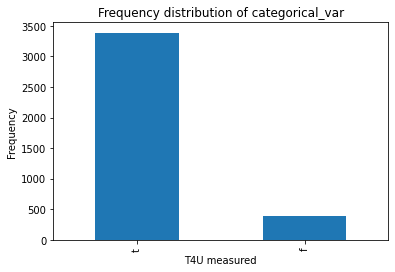

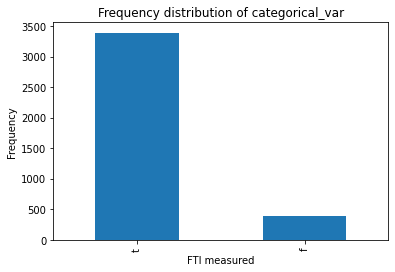

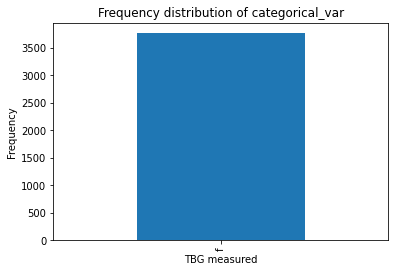

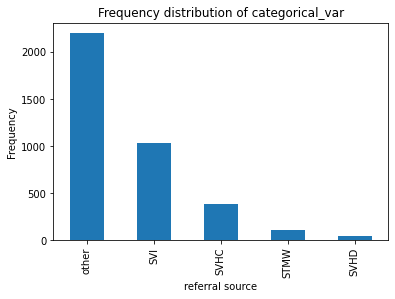

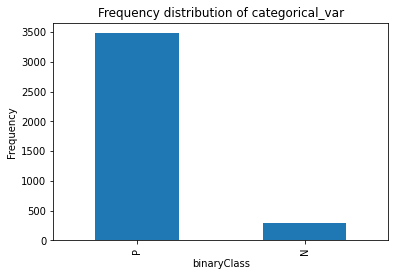

In [ ]:
plt.figure(figsize=(8,6))
for i in df_categorical_features:
  thyroid_data[i].value_counts().plot(kind='bar')
  plt.title('Frequency distribution of categorical_var')
  plt.xlabel(i) 
  plt.ylabel('Frequency')
  plt.show()

In [ ]:
copy_ds=thyroid_data.copy()

In [ ]:
#Pandas dataframe.corr() is used to find the pairwise correlation of all columns in the Pandas Dataframe in Python. Any NaN values are automatically excluded. 
#Any non-numeric data type or columns in the Dataframe, it is ignored.
copy_ds.corr()

,age,TSH,T3,TT4,T4U,FTI,TBG
age,1.000000,-0.059087,-0.238412,-0.038841,-0.166250,0.052788,NaN
TSH,-0.059087,1.000000,-0.161823,-0.267365,0.073391,-0.304684,NaN
T3,-0.238412,-0.161823,1.000000,0.559503,0.454127,0.348921,NaN
TT4,-0.038841,-0.267365,0.559503,1.000000,0.434572,0.793312,NaN
T4U,-0.166250,0.073391,0.454127,0.434572,1.000000,-0.174012,NaN
FTI,0.052788,-0.304684,0.348921,0.793312,-0.174012,1.000000,NaN
TBG,NaN,NaN,NaN,NaN,NaN,NaN,NaN


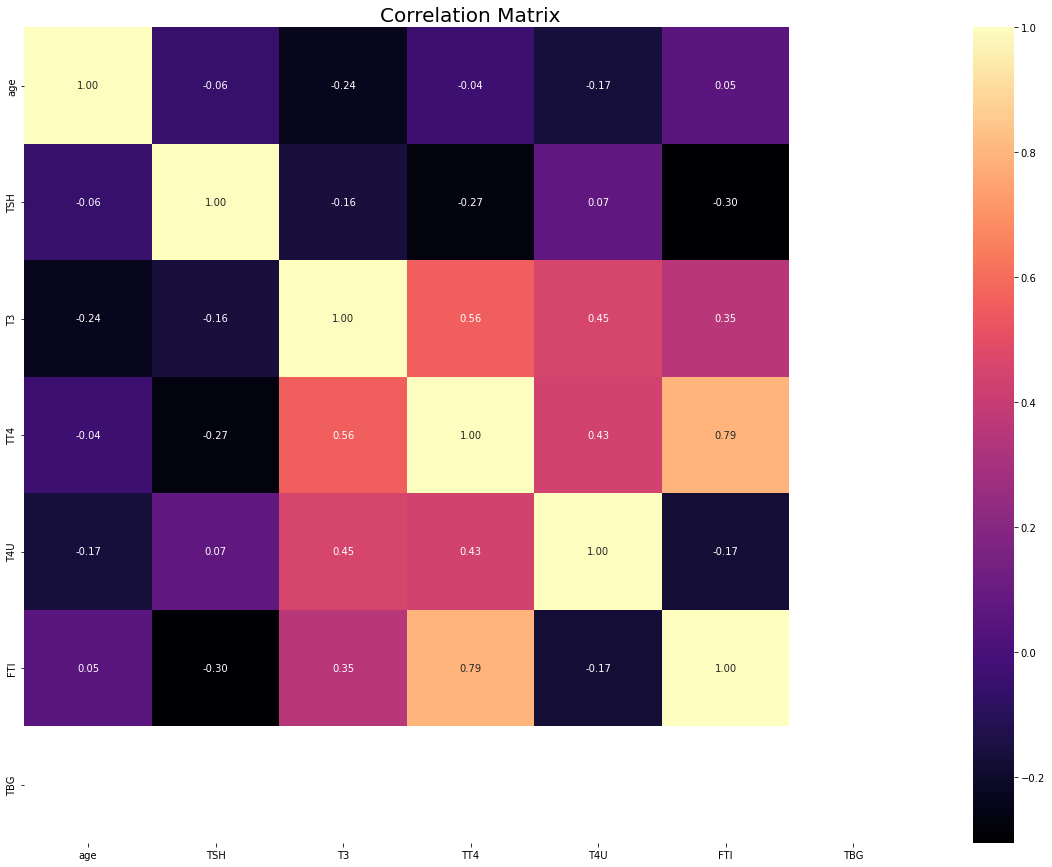

In [ ]:
%matplotlib inline
f,ax = plt.subplots()
f.set_size_inches(20, 15)
sns.heatmap(copy_ds.corr(),annot=True , fmt=".2f" , cmap="magma")
ax.set_title("Correlation Matrix" , fontsize=20)
plt.show()

<Axes: xlabel='binaryClass', ylabel='FTI'>

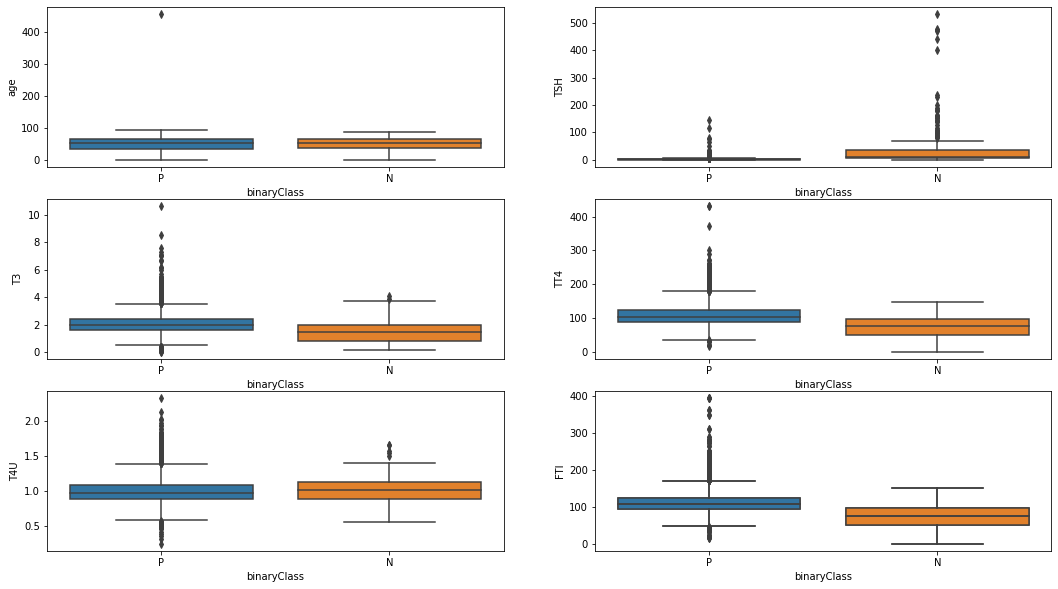

In [ ]:
#Check for outliers
fig, axes = plt.subplots(3,2, figsize=(18, 10))
  

sns.boxplot(ax=axes[0, 0], data=copy_ds, x='binaryClass', y='age')
sns.boxplot(ax=axes[0, 1], data=copy_ds, x='binaryClass', y='TSH')

sns.boxplot(ax=axes[1, 0], data=copy_ds, x='binaryClass', y='T3')
sns.boxplot(ax=axes[1, 1], data=copy_ds, x='binaryClass', y='TT4')
sns.boxplot(ax=axes[2, 0], data=copy_ds, x='binaryClass', y='T4U')
sns.boxplot(ax=axes[2, 1], data=copy_ds, x='binaryClass', y='FTI')
sns.boxplot(ax=axes[2, 1], data=copy_ds, x='binaryClass', y='FTI')

In [ ]:
df_categorical_features1 = copy_ds.select_dtypes(include='object')
df_numerical_features1 = copy_ds.select_dtypes(exclude='object')

In [ ]:
# Checking all the unique values inside categorical features
for feature in df_categorical_features1:
    print('---------------------------------')
    print(f"{feature}:{df_categorical_features1[feature].unique()}")
# df_categorical_features['sex'].unique()

---------------------------------
sex:['F' 'M' nan]
---------------------------------
on thyroxine:['f' 't']
---------------------------------
query on thyroxine:['f' 't']
---------------------------------
on antithyroid medication:['f' 't']
---------------------------------
sick:['f' 't']
---------------------------------
pregnant:['f' 't']
---------------------------------
thyroid surgery:['f' 't']
---------------------------------
I131 treatment:['f' 't']
---------------------------------
query hypothyroid:['f' 't']
---------------------------------
query hyperthyroid:['f' 't']
---------------------------------
lithium:['f' 't']
---------------------------------
goitre:['f' 't']
---------------------------------
tumor:['f' 't']
---------------------------------
hypopituitary:['f' 't']
---------------------------------
psych:['f' 't']
---------------------------------
TSH measured:['t' 'f']
---------------------------------
T3 measured:['t' 'f']
---------------------------------
TT4 

In [ ]:
data = pd.concat([df_categorical_features1, df_numerical_features1], axis=1)
data.head()

,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,...,TBG measured,referral source,binaryClass,age,TSH,T3,TT4,T4U,FTI,TBG
0,F,f,f,f,f,f,f,f,f,f,...,f,SVHC,P,41.0,1.30,2.5,125.0,1.14,109.0,NaN
1,F,f,f,f,f,f,f,f,f,f,...,f,other,P,23.0,4.10,2.0,102.0,NaN,NaN,NaN
2,M,f,f,f,f,f,f,f,f,f,...,f,other,P,46.0,0.98,NaN,109.0,0.91,120.0,NaN
3,F,t,f,f,f,f,f,f,f,f,...,f,other,P,70.0,0.16,1.9,175.0,NaN,NaN,NaN
4,F,f,f,f,f,f,f,f,f,f,...,f,SVI,P,70.0,0.72,1.2,61.0,0.87,70.0,NaN


In [ ]:
data=data.drop('TBG',axis=1)
data=data.drop('TBG measured',axis=1)

In [ ]:
data['binaryClass'].value_counts()

P    3481
N     291
Name: binaryClass, dtype: int64

age       Axes(0.125,0.125;0.110714x0.755)
TSH    Axes(0.257857,0.125;0.110714x0.755)
T3     Axes(0.390714,0.125;0.110714x0.755)
TT4    Axes(0.523571,0.125;0.110714x0.755)
T4U    Axes(0.656429,0.125;0.110714x0.755)
FTI    Axes(0.789286,0.125;0.110714x0.755)
dtype: object

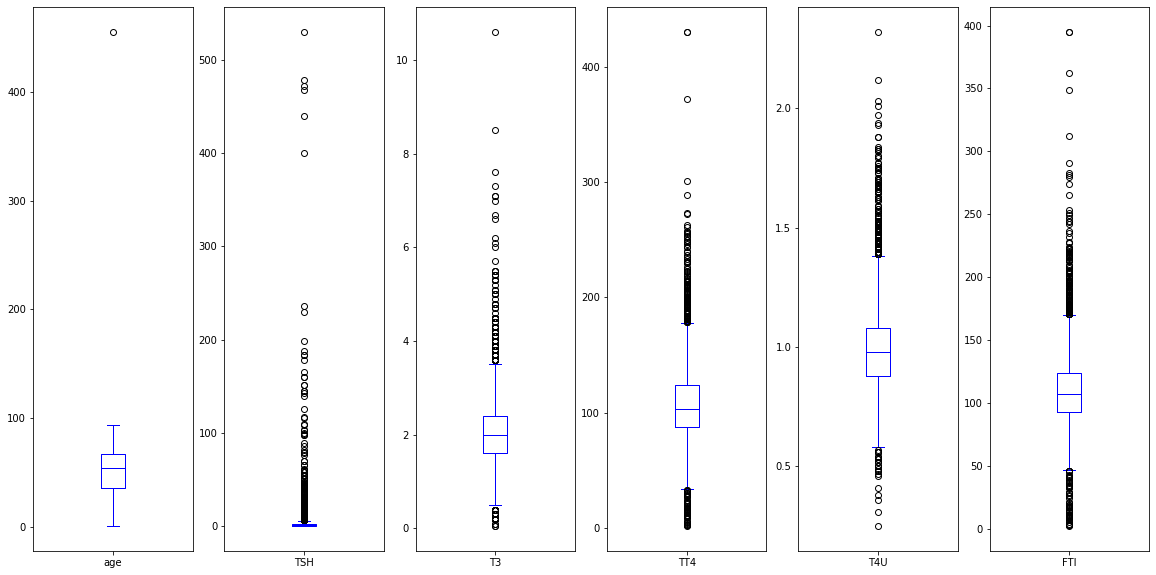

In [ ]:
data.plot(kind='box',subplots=True,sharex=False,sharey=False,figsize=(20,10),color='blue')

In [ ]:
from sklearn.impute import SimpleImputer

#Handle numerical features
simple_imputer=SimpleImputer(strategy='median')
numerical_missing=pd.DataFrame(simple_imputer.fit_transform(data.select_dtypes(exclude='O')))

#Handle categorical features
cat_imputation=SimpleImputer(strategy='most_frequent')
categorical_missing=pd.DataFrame(cat_imputation.fit_transform(data.select_dtypes(exclude='number')))

numerical_missing.columns=data.select_dtypes(exclude='O').columns
categorical_missing.columns=data.select_dtypes(exclude='number').columns

df=pd.concat([numerical_missing,categorical_missing],axis=1)

In [ ]:
# Checking all the unique values inside categorical features
for feature in categorical_missing :
    print('---------------------------------')
    print(f"{feature}:{categorical_missing[feature].unique()}")
# df_categorical_features['sex'].unique()

---------------------------------
sex:['F' 'M']
---------------------------------
on thyroxine:['f' 't']
---------------------------------
query on thyroxine:['f' 't']
---------------------------------
on antithyroid medication:['f' 't']
---------------------------------
sick:['f' 't']
---------------------------------
pregnant:['f' 't']
---------------------------------
thyroid surgery:['f' 't']
---------------------------------
I131 treatment:['f' 't']
---------------------------------
query hypothyroid:['f' 't']
---------------------------------
query hyperthyroid:['f' 't']
---------------------------------
lithium:['f' 't']
---------------------------------
goitre:['f' 't']
---------------------------------
tumor:['f' 't']
---------------------------------
hypopituitary:['f' 't']
---------------------------------
psych:['f' 't']
---------------------------------
TSH measured:['t' 'f']
---------------------------------
T3 measured:['t' 'f']
---------------------------------
TT4 meas

In [ ]:
df.head()

,age,TSH,T3,TT4,T4U,FTI,sex,on thyroxine,query on thyroxine,on antithyroid medication,...,tumor,hypopituitary,psych,TSH measured,T3 measured,TT4 measured,T4U measured,FTI measured,referral source,binaryClass
0,41.0,1.30,2.5,125.0,1.14,109.0,F,f,f,f,...,f,f,f,t,t,t,t,t,SVHC,P
1,23.0,4.10,2.0,102.0,0.98,107.0,F,f,f,f,...,f,f,f,t,t,t,f,f,other,P
2,46.0,0.98,2.0,109.0,0.91,120.0,M,f,f,f,...,f,f,f,t,f,t,t,t,other,P
3,70.0,0.16,1.9,175.0,0.98,107.0,F,t,f,f,...,f,f,f,t,t,t,f,f,other,P
4,70.0,0.72,1.2,61.0,0.87,70.0,F,f,f,f,...,f,f,f,t,t,t,t,t,SVI,P


In [ ]:
df['referral source'].value_counts()

other    2201
SVI      1034
SVHC      386
STMW      112
SVHD       39
Name: referral source, dtype: int64

In [ ]:
df.shape

(3772, 28)

In [ ]:
df.isnull().sum()

age                          0
TSH                          0
T3                           0
TT4                          0
T4U                          0
FTI                          0
sex                          0
on thyroxine                 0
query on thyroxine           0
on antithyroid medication    0
sick                         0
pregnant                     0
thyroid surgery              0
I131 treatment               0
query hypothyroid            0
query hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH measured                 0
T3 measured                  0
TT4 measured                 0
T4U measured                 0
FTI measured                 0
referral source              0
binaryClass                  0
dtype: int64

age       Axes(0.125,0.125;0.110714x0.755)
TSH    Axes(0.257857,0.125;0.110714x0.755)
T3     Axes(0.390714,0.125;0.110714x0.755)
TT4    Axes(0.523571,0.125;0.110714x0.755)
T4U    Axes(0.656429,0.125;0.110714x0.755)
FTI    Axes(0.789286,0.125;0.110714x0.755)
dtype: object

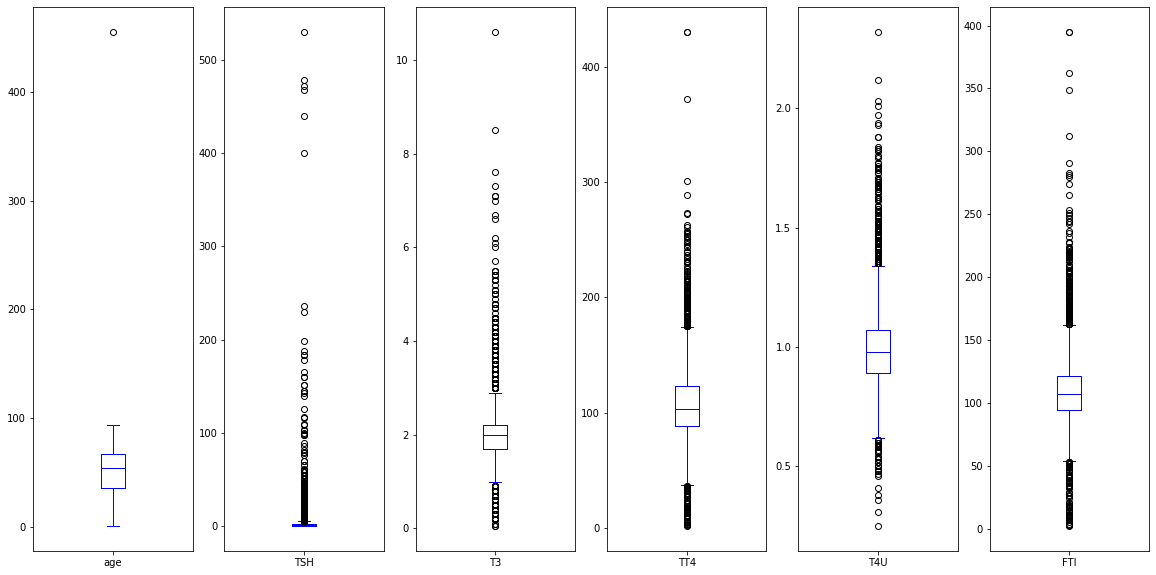

In [ ]:
df.plot(kind='box',subplots=True,sharex=False,sharey=False,figsize=(20,10),color='blue')

#Outliers detection and removal
Since all the numerical features not following Normal distribution, will use percentile method to detect the outliers and remove them

In [ ]:
df[df.age>100]

,age,TSH,T3,TT4,T4U,FTI,sex,on thyroxine,query on thyroxine,on antithyroid medication,...,tumor,hypopituitary,psych,TSH measured,T3 measured,TT4 measured,T4U measured,FTI measured,referral source,binaryClass
1364,455.0,1.1,2.0,118.0,1.13,104.0,F,f,f,f,...,f,f,f,t,t,t,t,t,SVI,P


In [ ]:
df=df.drop(df.age.index[1364])

In [ ]:
def outliers_removal(numerical_missing):
    for column in numerical_missing:
        sort=np.sort(numerical_missing[column])
        lower_limit,upper_limit=np.percentile(sort,[0,95])
        detected_outliers=numerical_missing.iloc[np.where((numerical_missing[column]>upper_limit) | (numerical_missing[column]<lower_limit))]
        return detected_outliers
outliers_data=outliers_removal(df)
outliers_data

,age,TSH,T3,TT4,T4U,FTI,sex,on thyroxine,query on thyroxine,on antithyroid medication,...,tumor,hypopituitary,psych,TSH measured,T3 measured,TT4 measured,T4U measured,FTI measured,referral source,binaryClass
7,80.0,2.20,0.6,80.0,0.70,115.0,F,f,f,f,...,f,f,f,t,t,t,t,t,SVI,P
10,84.0,1.10,2.2,115.0,0.95,121.0,F,f,f,f,...,t,f,f,t,t,t,t,t,SVI,P
18,80.0,6.00,1.6,99.0,0.95,104.0,F,f,f,f,...,f,f,t,t,t,t,t,t,SVI,P
22,81.0,1.90,0.3,102.0,0.96,106.0,M,f,f,f,...,f,f,f,t,t,t,t,t,SVI,P
34,85.0,7.30,2.4,66.0,1.09,61.0,F,f,f,f,...,f,f,f,t,t,t,t,t,other,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3731,80.0,0.80,2.3,124.0,1.04,118.0,F,f,f,f,...,f,f,f,t,t,t,t,t,SVI,P
3732,84.0,0.30,2.0,154.0,0.97,159.0,F,t,f,f,...,f,f,f,t,f,t,t,t,other,P
3737,81.0,2.50,1.8,76.0,1.02,75.0,F,f,f,f,...,f,f,f,t,t,t,t,t,SVI,P
3755,81.0,1.40,1.0,92.0,0.99,93.0,F,f,f,f,...,f,f,f,t,t,t,t,t,other,P


In [ ]:
new_df=df.drop(outliers_data.index)
new_df.head()

,age,TSH,T3,TT4,T4U,FTI,sex,on thyroxine,query on thyroxine,on antithyroid medication,...,tumor,hypopituitary,psych,TSH measured,T3 measured,TT4 measured,T4U measured,FTI measured,referral source,binaryClass
0,41.0,1.30,2.5,125.0,1.14,109.0,F,f,f,f,...,f,f,f,t,t,t,t,t,SVHC,P
1,23.0,4.10,2.0,102.0,0.98,107.0,F,f,f,f,...,f,f,f,t,t,t,f,f,other,P
2,46.0,0.98,2.0,109.0,0.91,120.0,M,f,f,f,...,f,f,f,t,f,t,t,t,other,P
3,70.0,0.16,1.9,175.0,0.98,107.0,F,t,f,f,...,f,f,f,t,t,t,f,f,other,P
4,70.0,0.72,1.2,61.0,0.87,70.0,F,f,f,f,...,f,f,f,t,t,t,t,t,SVI,P


In [ ]:
# Q1 = new_df.quantile(0.25)
# Q2 = new_df.quantile(0.75)
# IQR = Q2 - Q1
# new_df = new_df[~((copy_ds < (Q1 - 1.5 * IQR)) | (copy_ds > (Q2 + 1.5 * IQR))).any(axis=1)]


In [ ]:
new_df.shape

(3588, 28)

In [ ]:
new_df.columns

Index(['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'sex', 'on thyroxine',
       'query on thyroxine', 'on antithyroid medication', 'sick', 'pregnant',
       'thyroid surgery', 'I131 treatment', 'query hypothyroid',
       'query hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary',
       'psych', 'TSH measured', 'T3 measured', 'TT4 measured', 'T4U measured',
       'FTI measured', 'referral source', 'binaryClass'],
      dtype='object')

In [ ]:
new_df['sex'].value_counts()

F    2493
M    1095
Name: sex, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
for column in new_df.columns:
  if new_df[column].dtype==np.number:
    continue
  new_df[column]=LabelEncoder().fit_transform(new_df[column])

In [ ]:
new_df

,age,TSH,T3,TT4,T4U,FTI,sex,on thyroxine,query on thyroxine,on antithyroid medication,...,tumor,hypopituitary,psych,TSH measured,T3 measured,TT4 measured,T4U measured,FTI measured,referral source,binaryClass
0,41.0,1.30,2.5,125.0,1.14,109.0,0,0,0,0,...,0,0,0,1,1,1,1,1,1,1
1,23.0,4.10,2.0,102.0,0.98,107.0,0,0,0,0,...,0,0,0,1,1,1,0,0,4,1
2,46.0,0.98,2.0,109.0,0.91,120.0,1,0,0,0,...,0,0,0,1,0,1,1,1,4,1
3,70.0,0.16,1.9,175.0,0.98,107.0,0,1,0,0,...,0,0,0,1,1,1,0,0,4,1
4,70.0,0.72,1.2,61.0,0.87,70.0,0,0,0,0,...,0,0,0,1,1,1,1,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30.0,1.40,2.0,103.0,0.98,107.0,0,0,0,0,...,1,0,0,0,0,0,0,0,4,1
3768,68.0,1.00,2.1,124.0,1.08,114.0,0,0,0,0,...,0,0,0,1,1,1,1,1,3,1
3769,74.0,5.10,1.8,112.0,1.07,105.0,0,0,0,0,...,0,0,0,1,1,1,1,1,4,1
3770,72.0,0.70,2.0,82.0,0.94,87.0,1,0,0,0,...,0,0,0,1,1,1,1,1,3,1


In [ ]:
new_df.describe()

,age,TSH,T3,TT4,T4U,FTI,sex,on thyroxine,query on thyroxine,on antithyroid medication,...,tumor,hypopituitary,psych,TSH measured,T3 measured,TT4 measured,T4U measured,FTI measured,referral source,binaryClass
count,3588.000000,3588.000000,3588.000000,3588.000000,3588.000000,3588.000000,3588.000000,3588.000000,3588.000000,3588.000000,...,3588.000000,3588.000000,3588.000000,3588.000000,3588.000000,3588.000000,3588.000000,3588.000000,3588.000000,3588.000000
mean,49.974916,4.834338,2.029431,108.075474,0.996377,109.891499,0.305184,0.127090,0.013378,0.011427,...,0.025362,0.000279,0.049331,0.899108,0.792921,0.937012,0.894649,0.895206,3.279543,0.921962
std,17.935141,23.884207,0.738783,34.724323,0.185335,31.507648,0.460549,0.333121,0.114903,0.106299,...,0.157245,0.016695,0.216589,0.301227,0.405269,0.242975,0.307048,0.306330,1.109130,0.268269
min,1.000000,0.005000,0.050000,2.000000,0.250000,2.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,0.600000,1.700000,89.000000,0.890000,94.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000
50%,53.000000,1.400000,2.000000,103.000000,0.980000,107.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000
75%,65.000000,2.400000,2.300000,123.000000,1.070000,121.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000
max,79.000000,530.000000,10.600000,430.000000,2.320000,395.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [ ]:
X = new_df.iloc[: , 0:-1]
Y = new_df.iloc[: , -1] 

In [ ]:
Y.value_counts()

1    3308
0     280
Name: binaryClass, dtype: int64

In [ ]:
X,Y=SMOTE().fit_resample(X,Y)


X.shape,Y.shape

((6616, 27), (6616,))

In [ ]:
Y.value_counts()

1    3308
0    3308
Name: binaryClass, dtype: int64

#Splitting the dataset into the Training set and Test set

In [ ]:
import lightgbm as lgb
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42)

# Convert the data to LightGBM format
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test)

# Define the parameters for the LightGBM model
params = {
    'boosting_type': 'gbdt',
    'objective': 'multiclass',
    'num_class': 3,
    'metric': 'multi_logloss',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': -1
}

# Train the LightGBM model
model = lgb.train(params,
                  train_data,
                  valid_sets=[train_data, test_data],
                  num_boost_round=1000,
                  early_stopping_rounds=10)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Convert the predictions from probabilities to class labels
y_pred = np.argmax(y_pred, axis=1)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)


print("Accuracy:", accuracy)

[1]	training's multi_logloss: 0.630111	valid_1's multi_logloss: 0.630099
Training until validation scores don't improve for 10 rounds
[2]	training's multi_logloss: 0.574931	valid_1's multi_logloss: 0.574921
[3]	training's multi_logloss: 0.526253	valid_1's multi_logloss: 0.526287
[4]	training's multi_logloss: 0.48298	valid_1's multi_logloss: 0.483074
[5]	training's multi_logloss: 0.444346	valid_1's multi_logloss: 0.444434
[6]	training's multi_logloss: 0.409917	valid_1's multi_logloss: 0.410107
[7]	training's multi_logloss: 0.378548	valid_1's multi_logloss: 0.378761
[8]	training's multi_logloss: 0.350106	valid_1's multi_logloss: 0.350465
[9]	training's multi_logloss: 0.324292	valid_1's multi_logloss: 0.324828
[10]	training's multi_logloss: 0.301044	valid_1's multi_logloss: 0.301692
[11]	training's multi_logloss: 0.279585	valid_1's multi_logloss: 0.280247
[12]	training's multi_logloss: 0.259992	valid_1's multi_logloss: 0.260674
[13]	training's multi_logloss: 0.245676	valid_1's multi_loglo

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=1)
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((5292, 27), (1324, 27), (5292,), (1324,))

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.ensemble import RandomForestClassifier

In [ ]:
print('Training dataset shape:', X_train.shape, Y_train.shape)
print('Testing dataset shape:', X_test.shape, Y_test.shape)

Y_train_resample_flat = Y_train.to_numpy().ravel()
Y_test_resample_flat = Y_test.to_numpy().ravel()

print('Training dataset shape:', X_train.shape, Y_train_resample_flat.shape)
print('Testing dataset shape:', X_test.shape, Y_test_resample_flat.shape)

Training dataset shape: (5292, 27) (5292,)
Testing dataset shape: (1324, 27) (1324,)
Training dataset shape: (5292, 27) (5292,)
Testing dataset shape: (1324, 27) (1324,)


In [ ]:
rf = RandomForestClassifier(n_estimators=100, max_depth=5)

forward_fs = sfs(rf , k_features=10,forward=True,floating=False,verbose=2,scoring='accuracy',cv=5)

forward_fs = forward_fs.fit(X_train, Y_train_resample_flat)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:   45.7s finished

[2023-03-19 09:03:55] Features: 1/10 -- score: 0.9854495895296594[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  26 out of  26 | elapsed:   45.9s finished

[2023-03-19 09:04:41] Features: 2/10 -- score: 0.9905512387296931[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:   43.4s finished

[2023-03-19 09:05:25] Features: 3/10 -- score: 0.9960316737800579[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

In [ ]:
feat_names = list(forward_fs.k_feature_names_)
print(feat_names)

X_train_new=X_train[['age','sex','TSH', 'TT4', 'FTI', 'on thyroxine', 'on antithyroid medication', 'goitre', 'hypopituitary', 'psych', 'T3 measured', 'referral source']]
X_test_new=X_test[['age','sex','TSH', 'TT4', 'FTI', 'on thyroxine',  'on antithyroid medication', 'goitre', 'hypopituitary', 'psych', 'T3 measured', 'referral source']]

['age', 'TSH', 'TT4', 'on thyroxine', 'query on thyroxine', 'thyroid surgery', 'tumor', 'psych', 'TSH measured', 'FTI measured']


In [ ]:
rf_model=rf.fit(X_train_new,Y_train_resample_flat)
def print_Score(clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        pred=clf.predict(x_train)
        clf_report=pd.DataFrame(classification_report(y_train,pred,output_dict=True))
        print("Train Result:\n===============")
        print(f"Accuracy Score:{accuracy_score(y_train,pred)*100:.2f}%")
        print("---------------------------------")
        print(f"Classification Report:\n{clf_report}")
        print("-----------------------------------")
        print(f"Confusion Matrix:\n{confusion_matrix(y_train,pred)}\n")
    elif train==False:
        pred=clf.predict(x_test)
        clf_report=pd.DataFrame(classification_report(y_test,pred,output_dict=True))
        print("Test Result:\n===============")
        print(f"Accuracy Score:{accuracy_score(y_test,pred)*100:.2f}%")
        print("---------------------------------")
        print(f"Classification Report:\n{clf_report}")
        print("---------------------------------")
        print(f"Confusion Matrix:\n{confusion_matrix(y_test,pred)}\n")
print_Score(rf_model,X_train_new,X_test_new,Y_train_resample_flat,Y_test_resample_flat,train=True)
print_Score(rf_model,X_train_new,X_test_new,Y_train_resample_flat,Y_test_resample_flat,train=False)

Train Result:
Accuracy Score:99.62%
---------------------------------
Classification Report:
                     0            1  accuracy    macro avg  weighted avg
precision     0.993647     0.998853  0.996221     0.996250      0.996234
recall        0.998873     0.993536  0.996221     0.996205      0.996221
f1-score      0.996253     0.996188  0.996221     0.996220      0.996221
support    2662.000000  2630.000000  0.996221  5292.000000   5292.000000
-----------------------------------
Confusion Matrix:
[[2659    3]
 [  17 2613]]

Test Result:
Accuracy Score:99.77%
---------------------------------
Classification Report:
                    0           1  accuracy    macro avg  weighted avg
precision    1.000000    0.995595  0.997734     0.997797      0.997744
recall       0.995356    1.000000  0.997734     0.997678      0.997734
f1-score     0.997673    0.997792  0.997734     0.997733      0.997734
support    646.000000  678.000000  0.997734  1324.000000   1324.000000
-------------

In [ ]:
lr=LogisticRegression(random_state=0,max_iter=10)

lr_model=lr.fit(X_train_new,Y_train_resample_flat)

lr_train_score=print_Score(lr_model,X_train_new,X_test_new,Y_train_resample_flat,Y_test_resample_flat,train=True)
lr_test_score=print_Score(lr_model,X_train_new,X_test_new,Y_train_resample_flat,Y_test_resample_flat,train=False)

Train Result:
Accuracy Score:97.39%
---------------------------------
Classification Report:
                     0            1  accuracy    macro avg  weighted avg
precision     0.963630     0.984825  0.973923     0.974227      0.974163
recall        0.985349     0.962357  0.973923     0.973853      0.973923
f1-score      0.974368     0.973462  0.973923     0.973915      0.973918
support    2662.000000  2630.000000  0.973923  5292.000000   5292.000000
-----------------------------------
Confusion Matrix:
[[2623   39]
 [  99 2531]]

Test Result:
Accuracy Score:98.04%
---------------------------------
Classification Report:
                    0           1  accuracy    macro avg  weighted avg
precision    0.976923    0.983680  0.980363     0.980301      0.980383
recall       0.982972    0.977876  0.980363     0.980424      0.980363
f1-score     0.979938    0.980769  0.980363     0.980354      0.980364
support    646.000000  678.000000  0.980363  1324.000000   1324.000000
-------------

In [ ]:
gnb=GaussianNB()

gnb_model=gnb.fit(X_train_new,Y_train_resample_flat)

gnb_train_score=print_Score(gnb_model,X_train_new,X_test_new,Y_train_resample_flat,Y_test_resample_flat,train=True)
gnb_test_score=print_Score(gnb_model,X_train_new,X_test_new,Y_train_resample_flat,Y_test_resample_flat,train=False)

Train Result:
Accuracy Score:60.41%
---------------------------------
Classification Report:
                     0            1  accuracy    macro avg  weighted avg
precision     0.560025     0.970123  0.604119     0.765074      0.763834
recall        0.993614     0.209886  0.604119     0.601750      0.604119
f1-score      0.716317     0.345108  0.604119     0.530712      0.531835
support    2662.000000  2630.000000  0.604119  5292.000000   5292.000000
-----------------------------------
Confusion Matrix:
[[2645   17]
 [2078  552]]

Test Result:
Accuracy Score:60.27%
---------------------------------
Classification Report:
                    0           1  accuracy    macro avg  weighted avg
precision    0.551546    0.975000  0.602719     0.763273      0.768390
recall       0.993808    0.230088  0.602719     0.611948      0.602719
f1-score     0.709392    0.372315  0.602719     0.540854      0.536780
support    646.000000  678.000000  0.602719  1324.000000   1324.000000
-------------

In [ ]:
knn=KNeighborsClassifier()
knn_model=knn.fit(X_train_new,Y_train_resample_flat)

knn_train_score=print_Score(knn_model,X_train_new,X_test_new,Y_train_resample_flat,Y_test_resample_flat,train=True)
knn_test_score=print_Score(knn_model,X_train_new,X_test_new,Y_train_resample_flat,Y_test_resample_flat,train=False)

Train Result:
Accuracy Score:98.45%
---------------------------------
Classification Report:
                     0            1  accuracy    macro avg  weighted avg
precision     0.972527     0.997268  0.984505     0.984898      0.984823
recall        0.997370     0.971483  0.984505     0.984427      0.984505
f1-score      0.984792     0.984206  0.984505     0.984499      0.984501
support    2662.000000  2630.000000  0.984505  5292.000000   5292.000000
-----------------------------------
Confusion Matrix:
[[2655    7]
 [  75 2555]]

Test Result:
Accuracy Score:97.89%
---------------------------------
Classification Report:
                    0           1  accuracy    macro avg  weighted avg
precision    0.962575    0.995427  0.978852     0.979001      0.979398
recall       0.995356    0.963127  0.978852     0.979241      0.978852
f1-score     0.978691    0.979010  0.978852     0.978851      0.978855
support    646.000000  678.000000  0.978852  1324.000000   1324.000000
-------------

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, KFold
import pandas as pd




# Initialize classifier and KFold object
clf = DecisionTreeClassifier(max_depth=5, min_samples_leaf=10)
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Calculate accuracy using cross-validation
scores = cross_val_score(clf, X_train_new,Y_train_resample_flat, cv=kf)

# Print mean and standard deviation of scores
print('Mean accuracy:', scores.mean())
print('Standard deviation:', scores.std())

# Fit classifier to entire dataset
clf.fit(X_train_new,Y_train_resample_flat)
dtc=DecisionTreeClassifier(random_state=0,max_depth=10,min_samples_split=5)
dt_model=dtc.fit(X_train_new,Y_train_resample_flat)

dt_train_score=print_Score(dt_model,X_train_new,X_test_new,Y_train_resample_flat,Y_test_resample_flat,train=True)
dt_test_model=print_Score(dt_model,X_train_new,X_test_new,Y_train_resample_flat,Y_test_resample_flat,train=False)

Mean accuracy: 0.9958440632021972
Standard deviation: 0.003755962954528047
Train Result:
Accuracy Score:99.81%
---------------------------------
Classification Report:
                     0            1  accuracy    macro avg  weighted avg
precision     0.996629     0.999619   0.99811     0.998124      0.998115
recall        0.999624     0.996578   0.99811     0.998101      0.998110
f1-score      0.998125     0.998096   0.99811     0.998110      0.998110
support    2662.000000  2630.000000   0.99811  5292.000000   5292.000000
-----------------------------------
Confusion Matrix:
[[2661    1]
 [   9 2621]]

Test Result:
Accuracy Score:99.70%
---------------------------------
Classification Report:
                    0           1  accuracy    macro avg  weighted avg
precision    1.000000    0.994135  0.996979     0.997067      0.996997
recall       0.993808    1.000000  0.996979     0.996904      0.996979
f1-score     0.996894    0.997059  0.996979     0.996977      0.996979
support  

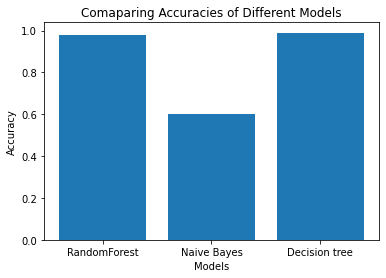

In [ ]:
models = ['RandomForest','Naive Bayes','Decision tree']
accuracy = [0.98,0.60,0.99]
plt.bar(models,accuracy)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comaparing Accuracies of Different Models')
plt.show()

In [ ]:
import pickle
filename = 'savedmodel.sav'
pickle.dump(clf,open(filename,'wb'))